## desalination heatTransferSurface _ 2bins 50/50 _ lr = 1e-3 _ 100 epochs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Any, Collection, Dict, List, Optional, Tuple, Union
from numpy.typing import ArrayLike
from fastcore.all import L
import pycm

In [3]:
def evaluate_classification(
    y_true: ArrayLike,
    y_pred: ArrayLike,
) -> Dict[str, Any]:
    """Evaluate a classification task.

    Args:
        y_true (ArrayLike): The true labels.
        y_pred (ArrayLike): The predicted labels.

    Returns:
        Dict[str, Any]: A dictionary of metrics.
    """
    might_have_rounded_floats = False
    assert len(y_true) == len(y_pred), "y_true and y_pred must be the same length."
    y_true = L([int(x) for x in y_true])

    y_pred_new = []
    int_indices = []
    for i, x in enumerate(y_pred):
        try:
            x_int = int(x)
            if x_int != x:
                might_have_rounded_floats = True
                logger.warning("y_pred contains rounded floats.")
            y_pred_new.append(x_int)
            int_indices.append(i)
        except Exception as e:
            y_pred_new.append(None)
    y_pred_new = L(y_pred_new)

    frac_valid = len(int_indices) / len(y_true)
    if len(int_indices) == 0:
        logger.warning("No valid predictions found.")
        y_pred_valid = L([None] * len(y_true))
        y_true_valid = y_true

    else:
        y_true_valid = y_true[int_indices]
        y_pred_valid = y_pred_new[int_indices]

    cm = pycm.ConfusionMatrix(list(y_true_valid), list(y_pred_valid))
    return {
        "accuracy": cm.Overall_ACC,
        "acc_macro": cm.ACC_Macro,
        "racc": cm.Overall_RACC,
        "kappa": cm.Kappa,
        "confusion_matrix": cm,
        "f1_macro": cm.F1_Macro,
        "f1_micro": cm.F1_Micro,
        "frac_valid": frac_valid,
        "all_y_true": y_true,
        "all_y_pred": y_pred,
        "valid_indices": int_indices,
        "might_have_rounded_floats": might_have_rounded_floats,
    }

In [4]:
from glob import glob
from fastcore.xtras import load_pickle
import os 
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt 
import matplotlib as mpl
#import seaborn as sns
import numpy as np 

from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 3.25
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

import sys

sys.path.append("../plotutils/")
from plotutils import *

plt.style.use("../plotutils/your.mplstyle")

import matplotx

In [5]:
all_res = glob(f"./*.pkl")
print(f"Pickles found: {len(all_res)}")

Pickles found: 30


### ADJUST dictionary according to experiment

In [6]:
compiled_res_list = []
conf_mats = []

for res in all_res:
    res = load_pickle(res)
    try:
        results = evaluate_classification(res["targets"], res["predictions"])
    except:
        results = evaluate_classification(res["true"], res["predictions"])
    summary = {
        'train_size': res['train_size'],
        'accuracy': results['accuracy'],
        'acc_macro': results['acc_macro'],
        'racc': results['racc'],
        'kappa': results['kappa'],
        'f1_macro': results['f1_macro'],
        'f1_micro': results['f1_micro'],
        'frac_valid': results['frac_valid'],
        'valid_indices': results['valid_indices'],
        'might_have_rounded_floats': results['might_have_rounded_floats'],
    }
    
    confusion_matrix = {
        'all_y_true': results['all_y_true'],
        'all_y_pred': results['all_y_pred']
    }
    
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

In [7]:
compiled_res = pd.DataFrame(compiled_res_list)

In [8]:
compiled_res = compiled_res.sort_values(['train_size']).iloc[:, 0:8]
compiled_res

,train_size,accuracy,acc_macro,racc,kappa,f1_macro,f1_micro,frac_valid
0,5,0.600000,0.600000,0.488000,0.218750,0.565972,0.600000,1.0
25,5,0.480000,0.480000,0.496000,-0.031746,0.476651,0.480000,1.0
20,5,0.520000,0.520000,0.494400,0.050633,0.512987,0.520000,1.0
8,5,0.600000,0.600000,0.504000,0.193548,0.594156,0.600000,1.0
14,5,0.520000,0.520000,0.494400,0.050633,0.512987,0.520000,1.0
2,5,0.760000,0.760000,0.507200,0.512987,0.750000,0.760000,1.0
1,10,0.850000,0.850000,0.500000,0.700000,0.849624,0.850000,1.0
6,10,0.800000,0.800000,0.500000,0.600000,0.791667,0.800000,1.0
21,10,0.850000,0.850000,0.500000,0.700000,0.849624,0.850000,1.0
9,10,0.750000,0.750000,0.500000,0.500000,0.744246,0.750000,1.0


### ADJUST columns according to grouping

In [9]:
grouped_res = compiled_res.groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy           acc_macro                racc            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
5           0.580000  0.040988  0.580000  0.040988  0.497333  0.002875   
10          0.800000  0.018257  0.800000  0.018257  0.500000  0.000000   
15          0.744444  0.049938  0.744444  0.049938  0.500000  0.003934   
20          0.733333  0.055777  0.733333  0.055777  0.500000  0.000000   
25          0.833333  0.061464  0.833333  0.061464  0.526667  0.019090   

               kappa            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
5           0.165801  0.079512  0.568792  0.040086  0.580000  0.040988   
10          0.600000  0.036515  0.796231  0.019262  0.800000  0.018257   
15          0.488240  0.100837  0.739542  0.051137  0.744444  0.049938   
20          0.466667  0.111555  0.724769  0.057739  0.733333  0.055777   
25          0.629371  0.150363  0.789484  0.093348  0.833333  0.061464   

           frac_valid       
                 mean  sem  
train_size                  
5                 1.0  0.0  
10                1.0  0.0  
15                1.0  0.0  
20                1.0  0.0  
25                1.0  0.0

[[0.66666667 0.33333333]
 [0.         1.        ]]
accuracy: 0.8333333333333333


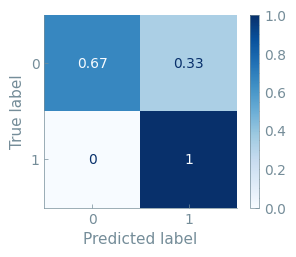

In [11]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]
confusion_matrix_max = []
for index, _ in enumerate(conf_mats_max):
    try:
        preds = conf_mats_max[index]
        actual = preds["all_y_true"]
        predicted = preds["all_y_pred"]
        confusion_matrix = metrics.confusion_matrix(actual, predicted)
        confusion_matrix_max.append(confusion_matrix)
    except Exception as e:
        print(e)
norm_confusion_matrix = sum(confusion_matrix_max)/[[sum(sum(confusion_matrix_max)[0])], [sum(sum(confusion_matrix_max)[1])]]
print(norm_confusion_matrix)

acc1=0
for i in range(len(norm_confusion_matrix)):
    acc=norm_confusion_matrix[i][i]
    acc1=acc1+acc
acc=acc1/sum(sum(norm_confusion_matrix))

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = norm_confusion_matrix, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.savefig('classif_heatTransferSurface_confusionMatrix_50_50_100ep_size25.pdf', bbox_inches='tight')

In [12]:
sizes = np.sort(compiled_res["train_size"].unique())

In [13]:
print(grouped_res.loc[np.sort(sizes), :]['accuracy'])

                mean       sem
train_size                    
5           0.580000  0.040988
10          0.800000  0.018257
15          0.744444  0.049938
20          0.733333  0.055777
25          0.833333  0.061464


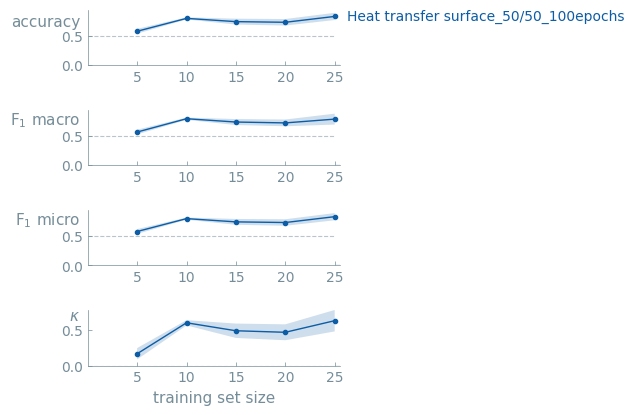

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

representations = ["50/50_100epochs"]

for representation in representations:
    ax[0].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean'],
        marker='o',
        label=f'Heat transfer surface_{representation}'
    )
    ax[0].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean']
        -grouped_res.loc[sizes, :]['accuracy']['sem'],
        grouped_res.loc[sizes, :]['accuracy']['mean']
        +grouped_res.loc[sizes, :]['accuracy']['sem'],
        alpha = 0.2
    )
    
    ax[0].hlines(0.95, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[0].hlines(0.5, 0, 25, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[0].hlines(0, 25, 25.5, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top('accuracy', ax=ax[0])
    ax[0].set_xticks(sizes)

    ax[1].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[1].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        -grouped_res.loc[sizes, :]['f1_macro']['sem'],
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        +grouped_res.loc[sizes, :]['f1_macro']['sem'],
        alpha=0.2
    )

    ax[1].hlines(0.95, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[1].hlines(0.5, 0, 25, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[1].hlines(0, 25, 25.5, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ macro', ax=ax[1])
    ax[1].set_xticks(sizes)

    ax[2].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean'],
        marker='o',
        label=f'{representation}'
    )

    ax[2].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        -grouped_res.loc[sizes, :]['f1_micro']['sem'],
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        +grouped_res.loc[sizes, :]['f1_micro']['sem'],
        alpha=0.2
    )

    ax[2].hlines(0.95, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[2].hlines(0.5, 0, 25, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[2].hlines(0, 25, 25.5, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ micro', ax=ax[2])
    ax[2].set_xticks(sizes)

    ax[3].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[3].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean']
        -grouped_res.loc[sizes, :]['kappa']['sem'],
        grouped_res.loc[sizes, :]['kappa']['mean']
        +grouped_res.loc[sizes, :]['kappa']['sem'],
        alpha=0.2
    )
    
    ax[3].hlines(0, 0, 25, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[3].hlines(0, 25, 25.5, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'$\kappa$', ax=ax[3])
    ax[3].set_xticks(sizes)

ax[-1].set_xlabel('training set size')

matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)
fig.savefig('classif_heatTransferSurface_50_50_100ep.pdf', bbox_inches='tight')